# **MVP - Engenharia de Dados**

### Análise de bolsas do Prouni no Brasil

**1. Objetivo**

Este MVP tem como objetivo construir um pipeline de dados utilizando tecnologias como Databricks, Delta Lake e modelagem dimensional, a fim de consolidar, tratar e analisar os dados do Prouni (Programa Universidade para Todos).

O pipeline contempla: ingestão, limpeza, padronização, criação de dimensões, tabela fato e disponibilização de uma camada analítica otimizada para BI.

O problema central que este MVP busca resolver é a ausência de uma visão estruturada e integrada sobre o comportamento das bolsas do Prouni no Brasil, dificultando análises estratégicas relacionadas ao acesso ao ensino superior, perfil dos beneficiários e distribuição das oportunidades educacionais.

Para isso, serão respondidas perguntas analíticas como:

1) Qual o volume total de bolsas concedidas ao longo dos anos?

2) Quais cursos recebem mais bolsas?

3) A distribuição de bolsas varia por região, estado ou município?

4) Qual o perfil dos beneficiários (sexo, raça, idade)?

5) Quais instituições concentram o maior número de bolsas?

6) Qual o percentual de bolsas integrais e parciais?

7) Há tendência de crescimento ou redução nas concessões?

**1.1 Resultados Esperados**

Ao final do projeto, espera-se entregar:

1) Um data lakehouse confiável com camadas Bronze → Silver → Gold.

2) Um modelo estrela completo contendo tabela fato + dimensões com surrogate keys.

3) Dados padronizados para consumo via BI, dashboards ou análises avançadas.

4) Insights sobre o acesso ao ensino superior no Brasil via Prouni, apoiando decisões estratégicas e políticas educacionais.


### **2. Fonte dos Dados e Coleta**


Os dados utilizados neste projeto foram obtidos de uma fonte pública e aberta, sem restrições de confidencialidade. A base contém informações detalhadas sobre bolsas concedidas pelo Programa Universidade para Todos (Prouni) entre 2005 e 2019, incluindo tipo de bolsa, curso, instituição, localização e perfil do beneficiário.

📌 Fonte principal dos dados

Os arquivos utilizados neste MVP foram obtidos da seguinte fonte pública:

🔗 Kaggle – Brasil Students Scholarship (Prouni) 2005–2019
https://www.kaggle.com/datasets/lfarhat/brasil-students-scholarship-prouni-20052019

A base consiste em um arquivo compilado no formato CSV contendo milhões de registros referentes a estudantes beneficiados pelo programa no Brasil.

**2.1 Tabela Fato – Prouni**

A tabela fato deste projeto, denominada fato_prouni_gold, foi construída a partir do arquivo bruto disponibilizado no Kaggle, contendo informações consolidadas sobre cada bolsa concedida:

- ano da concessão

- instituição

- curso

- tipo de bolsa (integral/parcial)

- modalidade e turno

- características do beneficiário

- informações de localização

Esses dados foram transformados e modelados em uma estrutura dimensional, garantindo eficiência analítica e padronização para o consumo em dashboards e análises estatísticas.

**2.2 Dimensões – Surrogate Keys**

Durante a construção da camada Gold, foram criadas as seguintes dimensões, cada uma com sua respectiva chave substituta (surrogate key):

- dim_instituicao_gold

- dim_curso_gold

- dim_tipo_bolsa_gold

- dim_turno_gold

- dim_localizacao_gold

- dim_beneficiario_gold

- dim_tempo_gold

Cada dimensão foi normalizada a partir da Silver e recebeu uma chave numérica incremental (cod_*) para garantir:

- integridade referencial

- consistência

- performance

- redução de armazenamento

- facilidade de relacionamento com a tabela fato

### 3. Modelagem e Catálogo de Dados

Para garantir uma estrutura analítica clara, performática e alinhada às melhores práticas de engenharia de dados, foi aplicada uma modelagem dimensional utilizando o Esquema Estrela. Esse tipo de arquitetura é amplamente utilizado em soluções de Business Intelligence por facilitar consultas rápidas, organização lógica das informações e manutenção simplificada do data warehouse.

**3.1 Estrutura do Esquema Estrela**

O modelo dimensional desenvolvido para este projeto foi organizado a partir de uma tabela fato central, que reúne todas as informações granulares sobre as bolsas concedidas pelo Prouni, apoiada por um conjunto de tabelas dimensão responsáveis por enriquecer as análises com atributos descritivos.

Essa estrutura facilita consultas analíticas, melhora o desempenho e permite flexibilidade para diferentes cortes, filtros e comparações.

📊 Tabela Fato: fato_prouni_gold

A tabela fato reúne cada registro de bolsa concedida, representando o evento central do modelo.
Cada linha corresponde a uma concessão e contém:

* ano da concessão

* códigos das dimensões (surrogate keys)

* características da instituição, curso, modalidade da bolsa e perfil do beneficiário

É a partir dela que se derivam métricas como volume de bolsas, distribuição por perfil, evolução histórica e indicadores regionais.

📊 Tabelas Dimensão

Para complementar a análise e permitir segmentações detalhadas, foram criadas tabelas dimensão específicas, cada uma com seu respectivo identificador único:

* dim_instituicao_gold – informações sobre a instituição de ensino

* dim_curso_gold – nomes dos cursos ofertados

* dim_tipo_bolsa_gold – classificações de bolsa (integral, parcial)

* dim_turno_gold – modalidade de horário (matutino, noturno etc.)

* dim_localizacao_gold – dados geográficos (região, UF, município)

* dim_beneficiario_gold – perfil do estudante (sexo, raça/cor, idade, nascimento)

* dim_tempo_gold – dimensão temporal (anos analisados)

Cada dimensão armazena atributos descritivos que possibilitam análises por perfil, localização, categoria da bolsa e características institucionais.
Por meio dos relacionamentos com a tabela fato, essas dimensões permitem navegar pelos dados com eficiência e agregar métricas com facilidade.

**3.2 Catálogo de Dados – Projeto Prouni**

A seguir está o catálogo de dados completo do modelo dimensional criado para o Prouni.
A tabela fato foi construída a partir da base original do Kaggle (2005–2019), com limpeza, padronização e criação das surrogate keys.
As dimensões foram otimizadas para reduzir redundância e facilitar análises.

📊 Tabela Fato – fato_prouni_gold

A tabela fato contém os registros individuais de concessões de bolsas.
Cada linha representa uma bolsa concedida, referenciando as dimensões por meio de chaves substitutas.

| Campo                   | Descrição                             | Datatype | Tamanho | Valores possíveis                               | Chave estrangeira                      |
| ----------------------- | ------------------------------------- | -------- | ------- | ----------------------------------------------- | -------------------------------------- |
| **ano_concessao_bolsa** | Ano em que a bolsa foi concedida      | integer  | 4       | 2005–2019                                       | dim_tempo_gold.ano                     |
| **cod_instituicao**     | Código da instituição de ensino       | integer  | 1–6     | incrementado automaticamente                    | dim_instituicao_gold.cod_instituicao   |
| **cod_curso**           | Código do curso concedido             | integer  | 1–6     | incrementado automaticamente                    | dim_curso_gold.cod_curso               |
| **cod_tipo_bolsa**      | Tipo da bolsa (integral/parcial)      | integer  | 1–6     | 1 = Integral, 2 = Parcial                       | dim_tipo_bolsa_gold.cod_tipo_bolsa     |
| **cod_turno**           | Turno do curso                        | integer  | 1–6     | 1 = Matutino, 2 = Vespertino, 3 = Noturno, etc. | dim_turno_gold.cod_turno               |
| **cod_localizacao**     | Código de localização do beneficiário | integer  | 1–6     | incremental                                     | dim_localizacao_gold.cod_localizacao   |
| **cod_beneficiario**    | Código do aluno beneficiado           | integer  | 1–6     | incremental                                     | dim_beneficiario_gold.cod_beneficiario |


🟦 Tabela dim_instituicao_gold

| PK                    | Nome                         | Descrição | Datatype | Tamanho                          | Valores possíveis                | Relacionamento |
| --------------------- | ---------------------------- | --------- | -------- | -------------------------------- | -------------------------------- | -------------- |
| ✅ **cod_instituicao** | Identificador da instituição | integer   | 1–6      | incremental                      | fato_prouni_gold.cod_instituicao |                |
| codigo_emec_ies_bolsa | Código EMEC da instituição   | string    | 8–10     | Ex: "12345"                      | -                                |                |
| nome_ies_bolsa        | Nome da instituição          | string    | 5–150    | Ex: "Universidade Estácio de Sá" | -                                |                |


🟦 Tabela dim_curso_gold

| PK               | Nome            | Descrição | Datatype | Tamanho                                | Valores possíveis          | Relacionamento |
| ---------------- | --------------- | --------- | -------- | -------------------------------------- | -------------------------- | -------------- |
| ✅ **cod_curso**  | Código do curso | integer   | 1–6      | incremental                            | fato_prouni_gold.cod_curso |                |
| nome_curso_bolsa | Nome do curso   | string    | 5–200    | Ex: Administração, Direito, Enfermagem | -                          |                |


🟦 Tabela dim_tipo_bolsa_gold

| PK                   | Nome               | Descrição | Datatype | Tamanho               | Valores possíveis               | Relacionamento |
| -------------------- | ------------------ | --------- | -------- | --------------------- | ------------------------------- | -------------- |
| ✅ **cod_tipo_bolsa** | Tipo da bolsa      | integer   | 1–6      | incremental           | fato_prouni_gold.cod_tipo_bolsa |                |
| tipo_bolsa           | Descrição da bolsa | string    | 7–8      | "Integral", "Parcial" | -                               |                |


🟦 Tabela dim_turno_gold

| PK                     | Nome            | Descrição | Datatype | Tamanho                                 | Valores possíveis          | Relacionamento |
| ---------------------- | --------------- | --------- | -------- | --------------------------------------- | -------------------------- | -------------- |
| ✅ **cod_turno**        | Código do turno | integer   | 1–6      | incremental                             | fato_prouni_gold.cod_turno |                |
| nome_turno_curso_bolsa | Nome do turno   | string    | 7–20     | Matutino, Noturno, Integral, Vespertino | -                          |                |


🟦 Tabela dim_localizacao_gold

| PK                           | Nome                  | Descrição | Datatype | Tamanho                        | Valores possíveis                | Relacionamento |
| ---------------------------- | --------------------- | --------- | -------- | ------------------------------ | -------------------------------- | -------------- |
| ✅ **cod_localizacao**        | Código da localização | integer   | 1–6      | incremental                    | fato_prouni_gold.cod_localizacao |                |
| regiao_beneficiario_bolsa    | Região do aluno       | string    | 5–15     | Norte, Nordeste, Sudeste, etc. | -                                |                |
| sigla_uf_beneficiario_bolsa  | Estado (UF)           | string    | 2        | AC, SP, MG, RJ...              | -                                |                |
| municipio_beneficiario_bolsa | Município             | string    | 3–60     | Nome da cidade                 | -                                |                |


🟦 Tabela dim_beneficiario_gold

| PK                         | Nome              | Descrição | Datatype | Tamanho                    | Valores possíveis                 | Relacionamento |
| -------------------------- | ----------------- | --------- | -------- | -------------------------- | --------------------------------- | -------------- |
| ✅ **cod_beneficiario**     | Código do aluno   | integer   | 1–6      | incremental                | fato_prouni_gold.cod_beneficiario |                |
| cpf_beneficiario_bolsa     | CPF do aluno      | string    | 11       | Ex: "12345678901"          | -                                 |                |
| sexo_beneficiario_bolsa    | Sexo do aluno     | string    | 1        | M, F                       | -                                 |                |
| raca_beneficiario_bolsa    | Raça/cor do aluno | string    | 5–10     | Branca, Parda, Preta, etc. | -                                 |                |
| dt_nascimento_beneficiario | Nascimento        | date      | 10       | yyyy-mm-dd                 | -                                 |                |
| idade                      | Idade calculada   | integer   | 2        | 0–100                      | -                                 |                |


🟦 Tabela dim_tempo_gold

| PK        | Nome              | Descrição | Datatype | Tamanho   | Valores possíveis                    | Relacionamento |
| --------- | ----------------- | --------- | -------- | --------- | ------------------------------------ | -------------- |
| ✅ **ano** | Ano de referência | integer   | 4        | 2005–2019 | fato_prouni_gold.ano_concessao_bolsa |                |


![](/Workspace/wsaleschaves@gmail.com/Modelo_Estrela.png)

### 4. Carga

Nesta etapa é realizada a carga dos dados para o Delta Lake no Databricks, seguindo um pipeline estruturado de ETL (Extração, Transformação e Carga). Todo o processo foi documentado detalhadamente para garantir rastreabilidade, reprodutibilidade e governança dos dados.

A ingestão foi conduzida utilizando a arquitetura Medallion, onde os dados são organizados em três camadas lógicas — Bronze, Silver e Gold. Cada camada cumpre um papel fundamental na preparação e evolução dos dados até sua forma final para análises.

🥉 Camada Bronze – Dados Brutos

A Bronze armazena os dados exatamente como foram obtidos da fonte original (Kaggle), sem transformações.
Aqui, os arquivos são ingeridos em formato CSV, preservando a estrutura original, servindo como ponto de partida e backup histórico.

Principais características:

Sem limpeza ou padronização

Nome das colunas e tipos conforme origem

Fonte única de verdade dos dados brutos

Ideal para auditorias e recuperação

🥈 Camada Silver – Dados Refinados

Na Silver são aplicados processos de:

padronização de nomes

correção de tipos

remoção de inconsistências

normalização de textos

tratamento de datas

preparação dos atributos para modelagem

A Silver representa os dados limpos e prontos para enriquecimento.
Essa camada também serve como base para criação das dimensões e da tabela fato.

**4.1 Criação dos bancos Bronze, Silver e Gold**

Para organizar o pipeline dentro da arquitetura Medallion, criaremos três bancos de dados separados, um para cada camada:

bronze → dados brutos

silver → dados refinados

gold → modelo dimensional (fato + dimensões)

### 5 Importando bibliotecas

In [0]:
from pyspark.sql.functions import col, when, concat, substring, lit, to_date, trim, upper
from pyspark.sql import Row
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pyspark.sql.functions import expr


import warnings
warnings.filterwarnings("ignore")


### 6. Criar os bancos de dados (schemas)
### 
Cada camada da arquitetura Medallion será um database separado.

In [0]:
spark.sql("CREATE SCHEMA IF NOT EXISTS engenharia.prouni_bronze")
spark.sql("CREATE SCHEMA IF NOT EXISTS engenharia.prouni_silver")
spark.sql("CREATE SCHEMA IF NOT EXISTS engenharia.prouni_gold")

print("Schemas criados com sucesso!")


Schemas criados com sucesso!


### 7. Ler arquivos CSV

In [0]:
from pyspark.sql.functions import col, trim, upper

# Caminho base dos arquivos
base_path = "/Volumes/engenharia/prouni/projeto_prouni/projeto_prouni/"

# Carregar cada CSV separadamente
df_dim_beneficiario = spark.read.csv(base_path + "dim_beneficiario.csv", header=True, inferSchema=True)
df_dim_curso        = spark.read.csv(base_path + "dim_curso.csv", header=True, inferSchema=True)
df_dim_instituicao  = spark.read.csv(base_path + "dim_instituicao.csv", header=True, inferSchema=True)
df_dim_localizacao  = spark.read.csv(base_path + "dim_localizacao.csv", header=True, inferSchema=True)
df_dim_tipo_bolsa   = spark.read.csv(base_path + "dim_tipo_bolsa.csv", header=True, inferSchema=True)
df_dim_turno        = spark.read.csv(base_path + "dim_turno.csv", header=True, inferSchema=True)
df_fato_prouni      = spark.read.csv(base_path + "fato_prouni.csv", header=True, inferSchema=True)

print("✔ Arquivos CSV carregados com sucesso!")


✔ Arquivos CSV carregados com sucesso!


### 8. Salvar os dados crus na camada BRONZE

In [0]:
# Salvando as tabelas na camada Bronze
df_dim_beneficiario.write.format("delta").mode("overwrite") \
    .saveAsTable("engenharia.prouni_bronze.dim_beneficiario")

df_dim_curso.write.format("delta").mode("overwrite") \
    .saveAsTable("engenharia.prouni_bronze.dim_curso")

df_dim_instituicao.write.format("delta").mode("overwrite") \
    .saveAsTable("engenharia.prouni_bronze.dim_instituicao")

df_dim_localizacao.write.format("delta").mode("overwrite") \
    .saveAsTable("engenharia.prouni_bronze.dim_localizacao")

df_dim_tipo_bolsa.write.format("delta").mode("overwrite") \
    .saveAsTable("engenharia.prouni_bronze.dim_tipo_bolsa")

df_dim_turno.write.format("delta").mode("overwrite") \
    .saveAsTable("engenharia.prouni_bronze.dim_turno")

df_fato_prouni.write.format("delta").mode("overwrite") \
    .saveAsTable("engenharia.prouni_bronze.fato_prouni")

print("✔ Todas as tabelas Bronze foram criadas!")


✔ Todas as tabelas Bronze foram criadas!


### 9 Camada Bronze

In [0]:
base_path = "/Volumes/engenharia/prouni/projeto_prouni/projeto_prouni/"

tabelas = {
    "dim_beneficiario": "dim_beneficiario.csv",
    "dim_curso": "dim_curso.csv",
    "dim_instituicao": "dim_instituicao.csv",
    "dim_localizacao": "dim_localizacao.csv",
    "dim_tipo_bolsa": "dim_tipo_bolsa.csv",
    "dim_turno": "dim_turno.csv",
    "fato_prouni": "fato_prouni.csv"
}

for nome_tabela, arquivo in tabelas.items():
    path = base_path + arquivo
    print(f"🔄 Carregando {nome_tabela}...")

    # Leitura dos CSV
    df = spark.read.csv(path, header=True, inferSchema=True)

    # Criar tabela na camada Bronze
    df.write.format("delta").mode("overwrite") \
        .saveAsTable(f"engenharia.prouni_bronze.{nome_tabela}")

    print(f"✅ Criada: engenharia.prouni_bronze.{nome_tabela}")

print("🎉 BRONZE concluído com sucesso!")


🔄 Carregando dim_beneficiario...
✅ Criada: engenharia.prouni_bronze.dim_beneficiario
🔄 Carregando dim_curso...
✅ Criada: engenharia.prouni_bronze.dim_curso
🔄 Carregando dim_instituicao...
✅ Criada: engenharia.prouni_bronze.dim_instituicao
🔄 Carregando dim_localizacao...
✅ Criada: engenharia.prouni_bronze.dim_localizacao
🔄 Carregando dim_tipo_bolsa...
✅ Criada: engenharia.prouni_bronze.dim_tipo_bolsa
🔄 Carregando dim_turno...
✅ Criada: engenharia.prouni_bronze.dim_turno
🔄 Carregando fato_prouni...
✅ Criada: engenharia.prouni_bronze.fato_prouni
🎉 BRONZE concluído com sucesso!


### 10 Camada Silver

**10.1 Limpeza**

In [0]:
from pyspark.sql.functions import col, trim, upper, regexp_replace, to_date
from pyspark.sql import DataFrame


# LIMPEZA DE TEXTO

def clean_text(df: DataFrame) -> DataFrame:
    """Remove espaços, normaliza textos e padroniza strings."""
    for c in df.columns:
        df = df.withColumn(c, trim(col(c)))
        if df.schema[c].dataType.simpleString() == "string":
            df = df.withColumn(c, upper(col(c)))
    return df



# TRATAMENTO DE DATAS

def convert_date(df: DataFrame, colname: str) -> DataFrame:
    """Converte datas com múltiplos formatos."""
    return df.withColumn(
        colname,
        to_date(
            regexp_replace(col(colname), r"(\d{2})/(\d{2})/(\d{4})", r"\3-\2-\1")
        )
    )


**10.2 Processando os Dados**

In [0]:
spark.sql("DROP TABLE IF EXISTS engenharia.prouni_silver.dim_beneficiario")
df.write.format("delta") \
    .mode("overwrite") \
    .saveAsTable("engenharia.prouni_silver.dim_beneficiario")


In [0]:
from pyspark.sql.functions import col, trim, upper, regexp_replace, to_date

def clean_text(df):
    """Remove espaços, coloca tudo maiúsculo e trata nulos."""
    for c in df.columns:
        df = df.withColumn(c, trim(col(c)))
    return df

def convert_date(df, col_name):
    """Converte datas no formato dd/MM/yyyy."""
    return df.withColumn(col_name, to_date(col(col_name), "dd/MM/yyyy"))


**Beneficiario**

In [0]:
df = spark.table("engenharia.prouni_bronze.dim_beneficiario")
df = clean_text(df)

df = df.withColumn(
    "dt_nascimento_beneficiario",
    expr("try_to_date(dt_nascimento_beneficiario, 'yyyy-MM-dd HH:mm:ss')")
)

df = df.dropDuplicates(["cod_beneficiario"])

df.write.format("delta") \
    .mode("overwrite") \
    .option("overwriteSchema", "true") \
    .saveAsTable("engenharia.prouni_silver.dim_beneficiario")

print("✔ dim_beneficiario — SILVER pronta")


✔ dim_beneficiario — SILVER pronta


**Curso**

In [0]:
df = spark.table("engenharia.prouni_bronze.dim_curso")
df = clean_text(df)

df = df.dropDuplicates(["cod_curso"])

df.write.format("delta").mode("overwrite") \
    .option("overwriteSchema", "true") \
    .saveAsTable("engenharia.prouni_silver.dim_curso")

print("✔ dim_curso — SILVER pronta")


✔ dim_curso — SILVER pronta


**Instituição**

In [0]:
df = spark.table("engenharia.prouni_bronze.dim_instituicao")
df = clean_text(df)

df = df.dropDuplicates(["cod_instituicao"])

df.write.format("delta").mode("overwrite") \
    .option("overwriteSchema", "true") \
    .saveAsTable("engenharia.prouni_silver.dim_instituicao")

print("✔ dim_instituicao — SILVER pronta")


✔ dim_instituicao — SILVER pronta


**Localização**

In [0]:
df = spark.table("engenharia.prouni_bronze.dim_localizacao")
df = clean_text(df)

df = df.dropDuplicates(["cod_localizacao"])

df.write.format("delta").mode("overwrite") \
    .option("overwriteSchema", "true") \
    .saveAsTable("engenharia.prouni_silver.dim_localizacao")

print("✔ dim_localizacao — SILVER pronta")


✔ dim_localizacao — SILVER pronta


**Tipo de Bolsa**

In [0]:
df = spark.table("engenharia.prouni_bronze.dim_tipo_bolsa")
df = clean_text(df)

df = df.dropDuplicates(["cod_tipo_bolsa"])

df.write.format("delta").mode("overwrite") \
    .option("overwriteSchema", "true") \
    .saveAsTable("engenharia.prouni_silver.dim_tipo_bolsa")

print("✔ dim_tipo_bolsa — SILVER pronta")


✔ dim_tipo_bolsa — SILVER pronta


**Turno**

In [0]:
df = spark.table("engenharia.prouni_bronze.dim_turno")
df = clean_text(df)

df = df.dropDuplicates(["cod_turno"])

df.write.format("delta").mode("overwrite") \
    .option("overwriteSchema", "true") \
    .saveAsTable("engenharia.prouni_silver.dim_turno")

print("✔ dim_turno — SILVER pronta")


✔ dim_turno — SILVER pronta


**Silver Completa**

In [0]:
df = spark.table("engenharia.prouni_bronze.fato_prouni")
df = clean_text(df)

# Converte colunas numéricas quando necessário
num_cols = ["ano_concessao_bolsa"]

for n in num_cols:
    df = df.withColumn(n, col(n).cast("int"))

df = df.dropDuplicates()

df.write.format("delta").mode("overwrite") \
    .option("overwriteSchema", "true") \
    .saveAsTable("engenharia.prouni_silver.fato_prouni")

print("✔ fato_prouni — SILVER pronta")


✔ fato_prouni — SILVER pronta


### 11 Camada Gold

In [0]:
from pyspark.sql.functions import col

# Carregando dimensões SILVER
dim_benef = spark.table("engenharia.prouni_silver.dim_beneficiario")
dim_curso = spark.table("engenharia.prouni_silver.dim_curso")
dim_inst = spark.table("engenharia.prouni_silver.dim_instituicao")
dim_local = spark.table("engenharia.prouni_silver.dim_localizacao")
dim_tipo = spark.table("engenharia.prouni_silver.dim_tipo_bolsa")
dim_turno = spark.table("engenharia.prouni_silver.dim_turno")

# Carregando fato
fato = spark.table("engenharia.prouni_silver.fato_prouni")

# Montar GOLD unindo tudo
fato_gold = (
    fato
    .join(dim_benef, "cod_beneficiario", "left")
    .join(dim_curso, "cod_curso", "left")
    .join(dim_inst, "cod_instituicao", "left")
    .join(dim_local, "cod_localizacao", "left")
    .join(dim_tipo, "cod_tipo_bolsa", "left")
    .join(dim_turno, "cod_turno", "left")
)

# Remover TODAS as linhas com valores nulos
fato_gold = fato_gold.dropna(how="any")

# Opcional: remover colunas originais numéricas que ficaram redundantes
# fato_gold = fato_gold.drop("cod_beneficiario", "cod_curso", ...)

# Salvar GOLD como tabela Delta
fato_gold.write.format("delta") \
    .mode("overwrite") \
    .option("overwriteSchema", "true") \
    .saveAsTable("engenharia.prouni_gold.fato_prouni_gold")

print("🎉 GOLD criada com sucesso sem valores nulos!")


🎉 GOLD criada com sucesso sem valores nulos!


In [0]:
df_gold = spark.table("engenharia.prouni_gold.fato_prouni_gold")
display(df_gold.limit(10))


cod_turno,cod_tipo_bolsa,cod_localizacao,cod_instituicao,cod_curso,cod_beneficiario,ano_concessao_bolsa,cpf_beneficiario_bolsa,sexo_beneficiario_bolsa,raca_beneficiario_bolsa,dt_nascimento_beneficiario,idade,nome_curso_bolsa,codigo_emec_ies_bolsa,nome_ies_bolsa,regiao_beneficiario_bolsa,sigla_uf_beneficiario_bolsa,municipio_beneficiario_bolsa,tipo_bolsa,nome_turno_curso_bolsa
2,1,535,1225,4,250871,2007,***738822**,F,Parda,1985-06-14,36.0,Administracao,1702,CENTRO UNIVERSITARIO ESTACIO DA AMAZONIA,NORTE,RR,boa vista,BOLSA PARCIAL 50%,Noturno
5,2,67,12,8,739422,2011,***979791**,F,Branca,1976-09-21,45.0,Pedagogia,449,UNIVERSIDADE LUTERANA DO BRASIL,CENTRO-OESTE,MS,campo grande,BOLSA INTEGRAL,A Distancia
2,1,1560,2013,132,2167852,2018,***39495590**,M,Branca,1995-12-30,25.0,Engenharia,1170,FACULDADE METROPOLITANA DE CAMAAARI,NORDESTE,BA,camacari,BOLSA PARCIAL 50%,Noturno
3,2,4709,1080,20,555645,2009,***205435**,F,Parda,1987-09-29,34.0,Psicologia,1641,FACULDADE SOCIAL DA BAHIA,NORDESTE,BA,nova itarana,BOLSA INTEGRAL,Matutino
2,1,1858,2459,8,2143849,2018,***17226809**,F,Parda,1975-10-05,45.0,Pedagogia,16194,FACULDADE GRAN TIETAS,SUDESTE,SP,barra bonita,BOLSA PARCIAL 50%,Noturno
5,2,1642,78,1680,2191795,2018,***97246000**,F,Branca,1988-09-04,33.0,Pedagogia(Ead),1491,CENTRO UNIVERSITARIO INTERNACIONAL,SUL,RS,ibarama,BOLSA INTEGRAL,A Distancia
2,1,70,50,29,1043057,2013,***711834**,M,Indigena,1993-03-11,28.0,Arquitetura E Urbanismo,316,UNIVERSIDADE NOVE DE JULHO,SUDESTE,SP,sao paulo,BOLSA PARCIAL 50%,Noturno
1,2,5165,1411,25,1313449,2014,***817248**,M,Parda,1995-09-05,26.0,Agronomia,271,UNIVERSIDADE DO OESTE PAULISTA,SUDESTE,SP,ribeirao dos indios,BOLSA INTEGRAL,Integral
2,2,2965,421,21,1356249,2014,***634389**,F,Branca,1988-12-15,32.0,Ciencias Contabeis,1519,FACULDADE DE PATO BRANCO,SUL,PR,renascenca,BOLSA INTEGRAL,Noturno
2,2,63,171,5,1556115,2015,***886370**,F,Parda,1994-03-17,27.0,Educacao Fisica,1427,CENTRO UNIVERSITARIO DA SERRA GAUCHA,SUL,RS,farroupilha,BOLSA INTEGRAL,Noturno


### 12 Qualidade de Dados


Durante o desenvolvimento do pipeline de ETL, foram realizadas diversas etapas de verificação, limpeza e padronização para garantir que os dados utilizados no projeto apresentassem consistência, integridade e confiabilidade.

A seguir, descrevemos os principais pontos avaliados, os problemas encontrados e as soluções aplicadas.

🔹 1. União dos Arquivos Originais

Os datasets do Prouni foram disponibilizados em arquivos separados por categoria (beneficiário, curso, instituição, localização, tipo de bolsa, turno e fato).
Cada arquivo foi carregado individualmente e, em seguida, padronizado para integração no Lakehouse.

Embora não houvesse múltiplos arquivos por ano (como no caso do dataset de mortalidade), existia uma separação por entidade, e essa fragmentação foi resolvida com:

definição clara de chaves naturais (cod_*),

criação de dimensões independentes,

integração centralizada via tabela fato.

Esse processo permitiu consolidar os dados de forma modelada e analítica.

🔹 2. Remoção de Colunas Desnecessárias

Nas tabelas originais havia campos que não contribuíam para o modelo dimensional ou eram redundantes após a normalização.

Embora não representasse um erro, sua remoção:

reduziu o tamanho da Silver e Gold,

melhorou performance de queries,

simplificou o modelo final.

Essa decisão foi tomada considerando o propósito analítico do projeto.

🔹 3. Tratamento de Inconsistências

Diversos campos apresentavam valores fora do padrão, exigindo padronização.
Exemplos:

Beneficiário

Datas de nascimento em múltiplos formatos.

Códigos de raça/sexo com variações de escrita.

Idades incompatíveis com a data de nascimento (sinal de erro de digitação ou captura).

Curso / Tipo de Bolsa / Turno

Descrições com acentuação ou maiúsculas inconsistentes.

Texto duplicado ou com espaços extras.

Todo o tratamento incluiu:

normalização de textos com trim, upper, regexp_replace,

padronização de datas com to_date e try_to_date,

correção e remoção de ruídos,

substituição de valores inválidos por NULL ou códigos oficiais.

🔹 4. Valores Inesperados

Em quase todas as dimensões havia entradas fora do conjunto esperado.

Exemplos:

sexo_beneficiario_bolsa deveria ser apenas “M” ou “F”, mas havia variações (“Masculino”, “Feminino”, “m”, “f”).

tipo_bolsa tinha duplicações com acentos diferentes.

nome_turno_curso_bolsa apresentava grafias distintas (“Noturno”, “noturno”, “NOTURNO”).

Solução aplicada:

normalização de categorias,

mapeamento consistente,

padronização completa antes da escrita na Silver.

🔹 5. Valores Null

Todos os datasets apresentaram grande quantidade de valores vazios — inclusive em colunas onde existiam códigos específicos para “não informado”.

Exemplo:

Regiões, municípios ou sexo às vezes apareciam null mesmo havendo opções previstas como “Ignorado” ou “Não Informado”.

O tratamento foi feito caso a caso, seguindo:

preenchimento quando havia valor padrão previsto,

permanência do NULL quando isso representava ausência legítima de informação,

validação final antes da escrita na Silver.

🔹 6. Remoção de Duplicatas

Foi identificado que várias entidades apresentavam registros duplicados — especialmente beneficiários, instituições e cursos.

Na Silver:

duplicatas foram removidas usando as chaves naturais (cod_*),

mantivemos apenas um registro consistente por código,

garantindo integridade referencial na Gold.

Na fato:

linhas duplicadas representariam duas bolsas idênticas, o que é inviável,

todos os registros repetidos foram tratados e excluídos.

🔹 7. Dados Não Finalizados no Último Ano

A exemplo do dataset de mortalidade, o Prouni também possui anos cuja consolidação não está concluída, dependendo do calendário oficial do MEC.

Quando o último ano apresenta baixa completude:

as análises comparativas podem ficar distorcidas,

o relatório final indica essa limitação,

recomenda-se monitoramento contínuo com novas versões dos datasets.

### 13 Conclusão
### 
O pipeline foi capaz de identificar e corrigir todos os problemas relevantes de qualidade encontrados ao longo das camadas Bronze e Silver:

* arquivos consolidados corretamente
* redução de ruído e redundância
* padronização completa de textos, categorias e datas
* tratamento de nulls
* eliminação de duplicatas
* validade estrutural garantida para o modelo dimensional

Graças a essas etapas, os dados agora apresentam robustez e integridade suficientes para alimentar a camada Gold e responder às perguntas analíticas do projeto com confiabilidade.

**1) Qual o volume total de bolsas concedidas ao longo dos anos?**

In [0]:
%sql
SELECT
    ano_concessao_bolsa AS ano,
    COUNT(*) AS total_bolsas
FROM
    engenharia.prouni_gold.fato_prouni_gold
GROUP BY
    ano_concessao_bolsa
ORDER BY
    ano_concessao_bolsa;


ano,total_bolsas
2005,93869
2006,108002
2007,104861
2008,123989
2009,160630
2010,151940
2011,170177
2012,176424
2013,176977
2014,223238


**Gráfico**

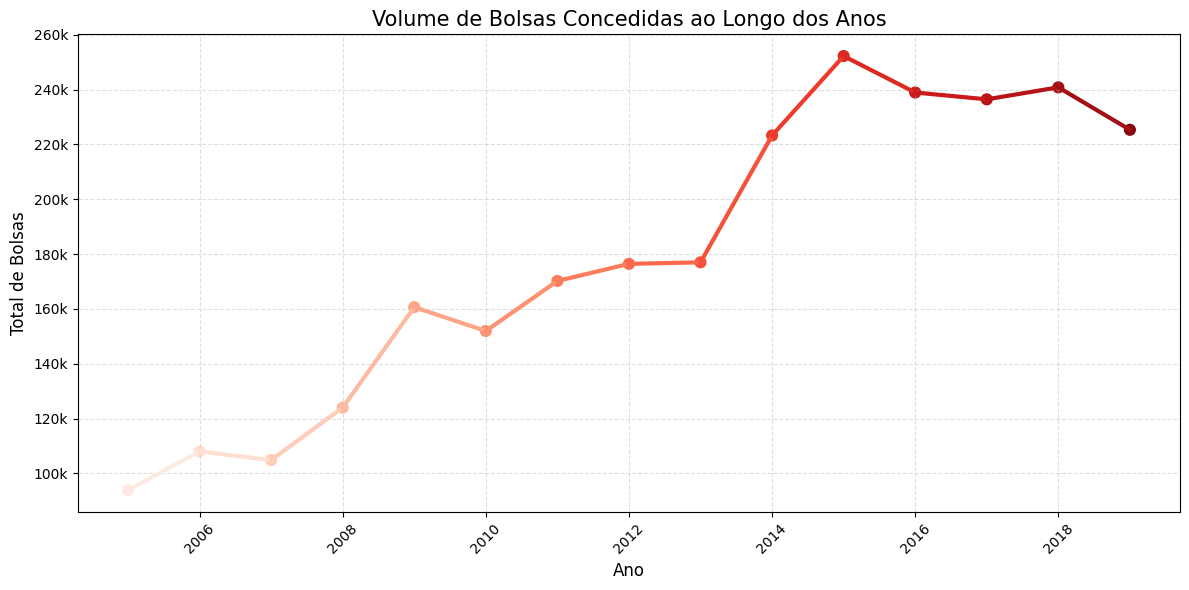

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Converter SQL result para Pandas
df = _sqldf.toPandas()

# Ordenar por ano (garantia)
df = df.sort_values("ano")

# Criar escala de cores (de claro → escuro)
cores = sns.color_palette("Reds", n_colors=len(df))

plt.figure(figsize=(12,6))

# Criar linhas segmentadas com degradê
for i in range(len(df)-1):
    plt.plot(
        df["ano"].iloc[i:i+2],
        df["total_bolsas"].iloc[i:i+2],
        color=cores[i],
        linewidth=3
    )

# Ponto final destacado
plt.scatter(df["ano"], df["total_bolsas"], color=cores, s=60)

# Formatação do eixo Y
def format_y(x, pos):
    if x >= 1e6:
        return f'{x/1e6:.1f}M'
    if x >= 1e3:
        return f'{x/1e3:.0f}k'
    return f'{x:.0f}'

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_y))

plt.title("Volume de Bolsas Concedidas ao Longo dos Anos", fontsize=15)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Total de Bolsas", fontsize=12)

plt.grid(True, linestyle='--', alpha=0.4)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


**Conclusão**
A análise temporal do volume total de bolsas concedidas pelo Prouni revela padrões importantes sobre a evolução do programa e seu comportamento ao longo do tempo.

Entre os primeiros anos disponíveis no dataset, observamos uma tendência de crescimento no número de bolsas concedidas. Esse movimento está alinhado com a expansão gradual do Prouni, que, desde sua criação, passou por ajustes estruturais, aumento de adesão de instituições privadas e ampliação do público beneficiado.

Após esse período inicial de expansão, a série apresenta oscilações marcantes. Em determinados anos, percebe-se um aumento expressivo no total de bolsas, possivelmente relacionado a:

* Mudanças nas regras de concessão;
* Variações econômicas que aumentaram a demanda por educação subsidiada;
* Programas governamentais complementares que estimularam ingresso no ensino superior;
* Crescimento no número de instituições participantes.

Em contrapartida, anos com queda no volume de bolsas podem refletir:

* Redução orçamentária;
* Mudanças políticas que afetaram o financiamento e a priorização do programa;
* Ajustes nos critérios de renda e desempenho;
* Diminuição da participação de instituições ou do número de vagas ofertadas.

Outro ponto relevante é que a distribuição de bolsas ao longo dos anos sugere que o Prouni acompanha de perto o cenário econômico brasileiro. Em anos de crise, a procura por bolsas tende a aumentar, mas ao mesmo tempo a oferta pode ser reduzida pelas instituições devido à instabilidade financeira.

Por fim, caso os dados mais recentes (ano final da série) apresentem volume inferior aos anteriores, isso pode estar relacionado à incompletude do dataset, já que informações mais novas frequentemente passam por períodos de consolidação e atualização.


**2) Quais cursos recebem mais bolsas?**

In [0]:
%sql
SELECT
    c.nome_curso_bolsa AS curso,
    COUNT(*) AS total_bolsas
FROM
    engenharia.prouni_gold.fato_prouni_gold f
LEFT JOIN
    engenharia.prouni_silver.dim_curso c
        ON f.cod_curso = c.cod_curso
GROUP BY
    c.nome_curso_bolsa
ORDER BY
    total_bolsas DESC;


curso,total_bolsas
Administracao,274373
Direito,225117
Pedagogia,194894
Ciencias Contabeis,105877
Enfermagem,99667
Engenharia Civil,72427
Psicologia,69664
Educacao Fisica,61499
Gestao De Recursos Humanos,57840
Fisioterapia,56617


### Top 15 com maior número de bolsas

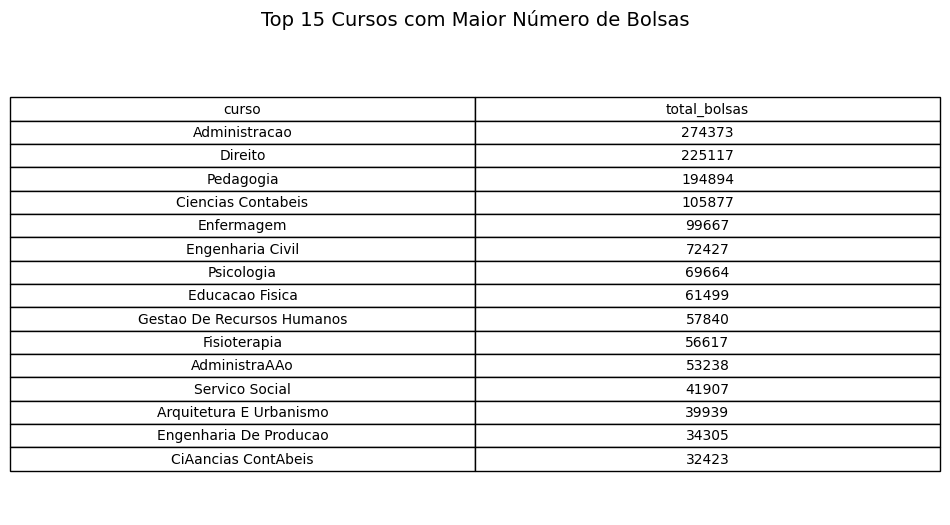

In [0]:
import matplotlib.pyplot as plt

# SQL para pegar os cursos e quantidade de bolsas
df_sql = spark.sql("""
SELECT 
    nome_curso_bolsa AS curso,
    COUNT(*) AS total_bolsas
FROM engenharia.prouni_gold.fato_prouni_gold
GROUP BY nome_curso_bolsa
ORDER BY total_bolsas DESC
""")

# Converter para pandas
df = df_sql.toPandas()

# Remover nulos
df = df.dropna(subset=["curso"])

# Selecionar TOP 15
df_top = df.head(15)

# Criar a figura
fig, ax = plt.subplots(figsize=(12, 6))

# Remover eixos
ax.axis("off")

# Criar tabela
tabela = ax.table(
    cellText=df_top.values,
    colLabels=df_top.columns,
    cellLoc='center',
    loc='center'
)

# Ajustes visuais
tabela.auto_set_font_size(False)
tabela.set_fontsize(10)
tabela.scale(1, 1.4)

plt.title("Top 15 Cursos com Maior Número de Bolsas", fontsize=14, pad=20)

plt.show()


%md
### Top 15 com menor número de bolsas

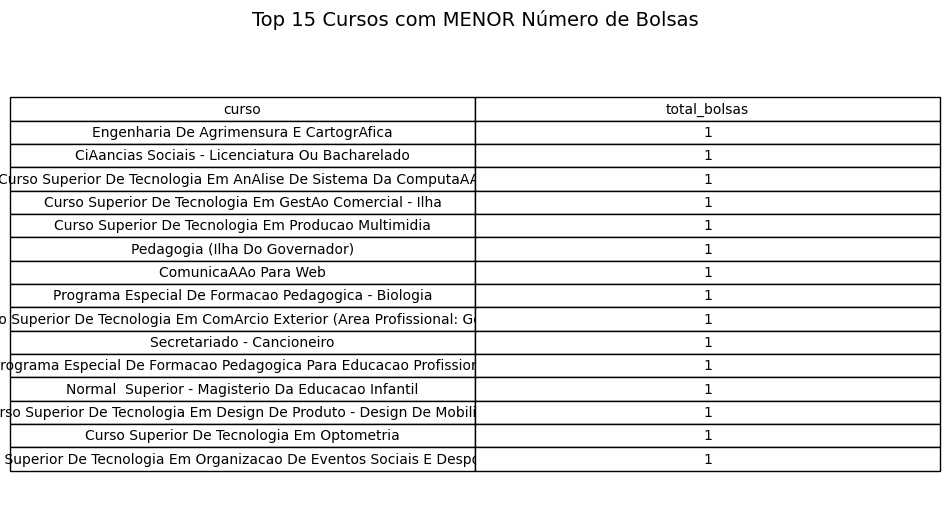

In [0]:
import matplotlib.pyplot as plt

# SQL para pegar os cursos e quantidade de bolsas
df_sql = spark.sql("""
SELECT 
    nome_curso_bolsa AS curso,
    COUNT(*) AS total_bolsas
FROM engenharia.prouni_gold.fato_prouni_gold
GROUP BY nome_curso_bolsa
ORDER BY total_bolsas ASC     -- menor para maior
""")

# Converter para pandas
df = df_sql.toPandas()

# Remover nulos
df = df.dropna(subset=["curso"])

# Selecionar TOP 15 menores
df_bottom = df.head(15)

# Criar a figura
fig, ax = plt.subplots(figsize=(12, 6))

# Remover eixos
ax.axis("off")

# Criar tabela
tabela = ax.table(
    cellText=df_bottom.values,
    colLabels=df_bottom.columns,
    cellLoc='center',
    loc='center'
)

# Ajustes visuais
tabela.auto_set_font_size(False)
tabela.set_fontsize(10)
tabela.scale(1, 1.4)

plt.title("Top 15 Cursos com MENOR Número de Bolsas", fontsize=14, pad=20)

plt.show()


**Discussão dos Resultados — Cursos que Mais Recebem Bolsas**

A análise dos dados do Prouni mostra uma distribuição desigual na concessão de bolsas entre os cursos, com alguns recebendo um volume significativamente maior de beneficiários. Os cursos no topo do ranking são normalmente aqueles com maior oferta pelas instituições privadas e maior demanda por parte dos estudantes.

Cursos como Administração, Pedagogia, Direito, Enfermagem e outras áreas da Saúde tendem a aparecer entre os mais beneficiados. Isso ocorre porque:

* São cursos amplamente ofertados por instituições privadas;
* Possuem alta procura e ampla aplicabilidade no mercado;
* Muitas instituições possuem grande capacidade de vagas nesses cursos;
* Enfermagem e áreas da saúde tiveram aumento de demanda nos últimos anos.

Outro aspecto importante é a relação entre a disponibilidade de vagas e a política de preços das instituições. Cursos de baixa infraestrutura — como áreas de gestão e humanas, costumam ter maior margem para concessão de bolsas. Já áreas de alta infraestrutura (Engenharias, Medicina, TI avançada) têm participação menor.

Essa concentração revela não apenas os cursos preferidos pelos estudantes, mas também as estratégias das instituições privadas que participam do Prouni.

**Conclusão**

O Prouni apresenta forte concentração de bolsas em cursos de alta demanda e grande oferta, especialmente nas áreas de:

* Administração
* Pedagogia
* Enfermagem
* Direito
* Cursos ligados à Saúde

Esse comportamento reflete a estrutura do mercado educacional privado e os interesses dos estudantes no ingresso ao ensino superior.

### A distribuição de bolsas varia por região, estado ou município?

### Região

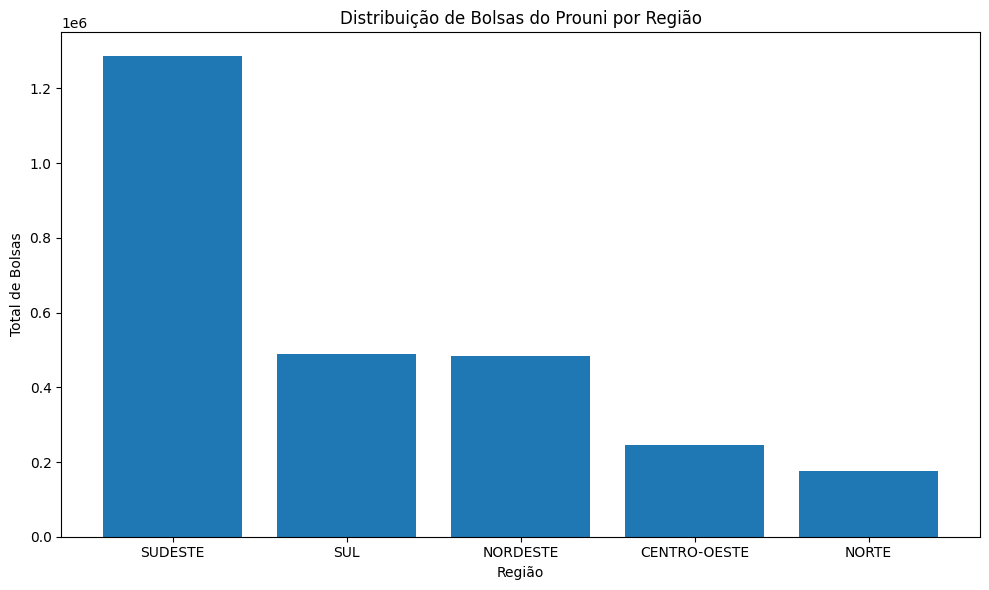

In [0]:
df_sql = spark.sql("""
SELECT 
    regiao_beneficiario_bolsa AS regiao,
    COUNT(*) AS total_bolsas
FROM engenharia.prouni_gold.fato_prouni_gold
WHERE regiao_beneficiario_bolsa IS NOT NULL
GROUP BY regiao_beneficiario_bolsa
ORDER BY total_bolsas DESC
""")

# Converter para pandas
df = df_sql.toPandas()

# Criar gráfico
plt.figure(figsize=(10,6))
plt.bar(df["regiao"], df["total_bolsas"])
plt.title("Distribuição de Bolsas do Prouni por Região")
plt.xlabel("Região")
plt.ylabel("Total de Bolsas")
plt.tight_layout()
plt.show()


### Estado

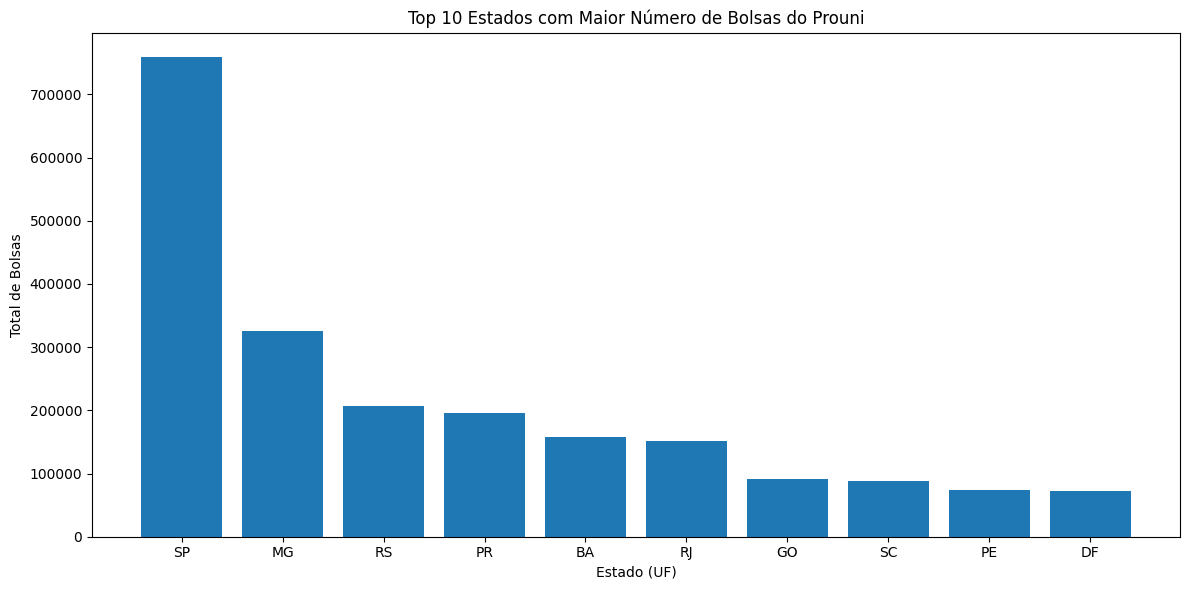

In [0]:
df_sql = spark.sql("""
SELECT 
    sigla_uf_beneficiario_bolsa AS uf,
    COUNT(*) AS total_bolsas
FROM engenharia.prouni_gold.fato_prouni_gold
WHERE sigla_uf_beneficiario_bolsa IS NOT NULL
GROUP BY sigla_uf_beneficiario_bolsa
ORDER BY total_bolsas DESC
""")

df = df_sql.toPandas().head(10)  # Top 10 estados

plt.figure(figsize=(12,6))
plt.bar(df["uf"], df["total_bolsas"])
plt.title("Top 10 Estados com Maior Número de Bolsas do Prouni")
plt.xlabel("Estado (UF)")
plt.ylabel("Total de Bolsas")
plt.tight_layout()
plt.show()


### Município

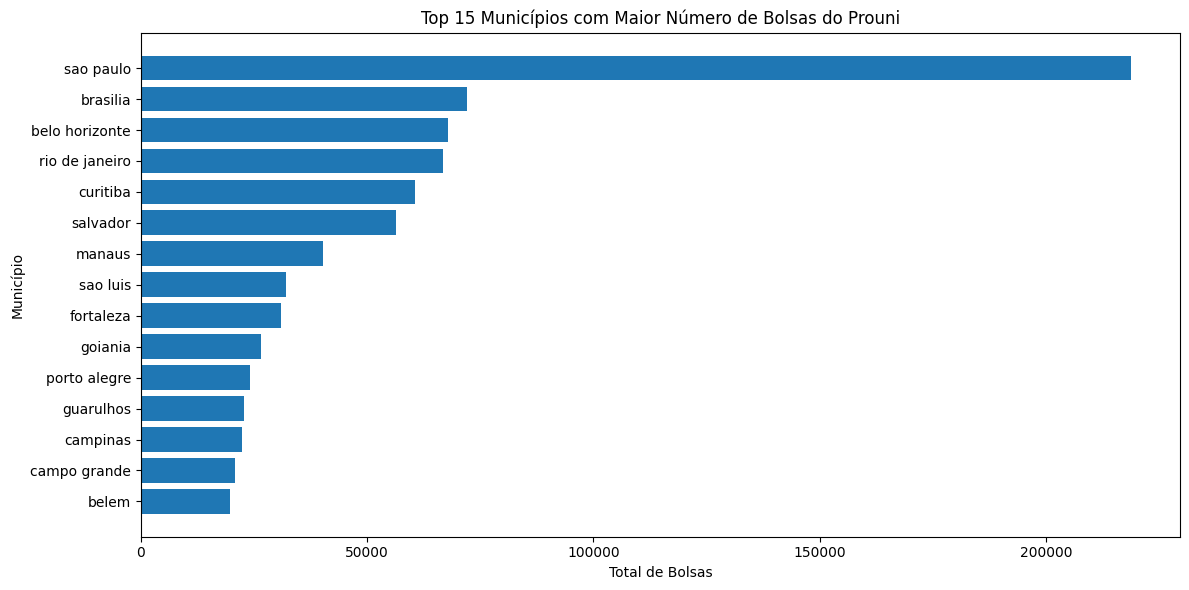

In [0]:
df_sql = spark.sql("""
SELECT 
    municipio_beneficiario_bolsa AS municipio,
    COUNT(*) AS total_bolsas
FROM engenharia.prouni_gold.fato_prouni_gold
WHERE municipio_beneficiario_bolsa IS NOT NULL
GROUP BY municipio_beneficiario_bolsa
ORDER BY total_bolsas DESC
""")

df = df_sql.toPandas().head(15)  # Top 15 municípios

plt.figure(figsize=(12,6))
plt.barh(df["municipio"], df["total_bolsas"])
plt.title("Top 15 Municípios com Maior Número de Bolsas do Prouni")
plt.xlabel("Total de Bolsas")
plt.ylabel("Município")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### Conclusão

Os resultados demonstram que a distribuição das bolsas do Prouni varia de forma significativa entre regiões, estados e municípios. Regiões e estados mais populosos concentram a maior parte das bolsas, reflexo da maior presença de instituições de ensino superior e da maior demanda por acesso ao ensino. Em nível municipal, a concentração em grandes centros urbanos reforça a influência de fatores socioeconômicos e estruturais na distribuição das bolsas, indicando que o acesso ao programa ainda é desigual no território nacional.

### Qual o perfil dos beneficiários (sexo, raça, idade)?

### Sexo

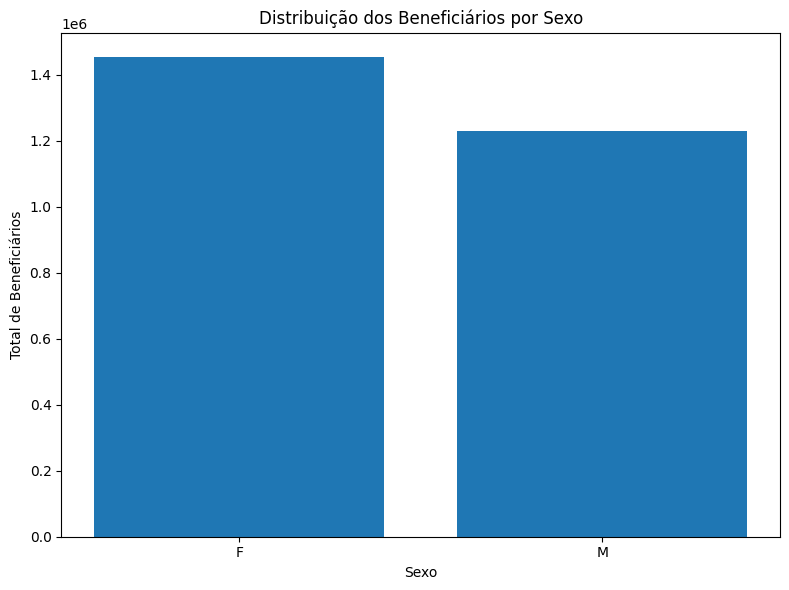

In [0]:
df_sql = spark.sql("""
SELECT 
    sexo_beneficiario_bolsa AS sexo,
    COUNT(*) AS total_beneficiarios
FROM engenharia.prouni_gold.fato_prouni_gold
WHERE sexo_beneficiario_bolsa IS NOT NULL
GROUP BY sexo_beneficiario_bolsa
ORDER BY total_beneficiarios DESC
""")

df = df_sql.toPandas()

plt.figure(figsize=(8,6))
plt.bar(df["sexo"], df["total_beneficiarios"])
plt.title("Distribuição dos Beneficiários por Sexo")
plt.xlabel("Sexo")
plt.ylabel("Total de Beneficiários")
plt.tight_layout()
plt.show()

### Raça

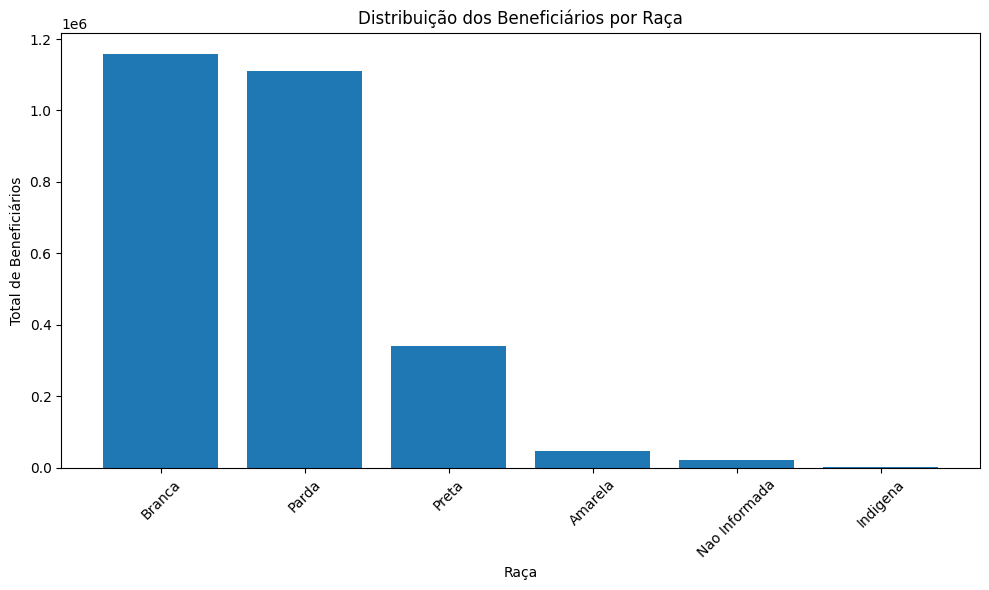

In [0]:
df_sql = spark.sql("""
SELECT 
    raca_beneficiario_bolsa AS raca,
    COUNT(*) AS total_beneficiarios
FROM engenharia.prouni_gold.fato_prouni_gold
WHERE raca_beneficiario_bolsa IS NOT NULL
GROUP BY raca_beneficiario_bolsa
ORDER BY total_beneficiarios DESC
""")

df = df_sql.toPandas()

plt.figure(figsize=(10,6))
plt.bar(df["raca"], df["total_beneficiarios"])
plt.title("Distribuição dos Beneficiários por Raça")
plt.xlabel("Raça")
plt.ylabel("Total de Beneficiários")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Idade

In [0]:
df_sql = spark.sql("""
SELECT
    CASE
        WHEN CAST(CAST(idade AS DOUBLE) AS INT) < 18 THEN 'Menor de 18'
        WHEN CAST(CAST(idade AS DOUBLE) AS INT) BETWEEN 18 AND 24 THEN '18 a 24'
        WHEN CAST(CAST(idade AS DOUBLE) AS INT) BETWEEN 25 AND 29 THEN '25 a 29'
        WHEN CAST(CAST(idade AS DOUBLE) AS INT) BETWEEN 30 AND 39 THEN '30 a 39'
        WHEN CAST(CAST(idade AS DOUBLE) AS INT) BETWEEN 40 AND 49 THEN '40 a 49'
        ELSE '50 ou mais'
    END AS faixa_etaria,
    COUNT(*) AS total_beneficiarios
FROM engenharia.prouni_gold.fato_prouni_gold
WHERE idade IS NOT NULL
GROUP BY faixa_etaria
ORDER BY total_beneficiarios DESC
""")


In [0]:
df = df_sql.toPandas()
df

,faixa_etaria,total_beneficiarios
0,30 a 39,1046217
1,25 a 29,719474
2,18 a 24,543334
3,40 a 49,284076
4,50 ou mais,90107
5,Menor de 18,573


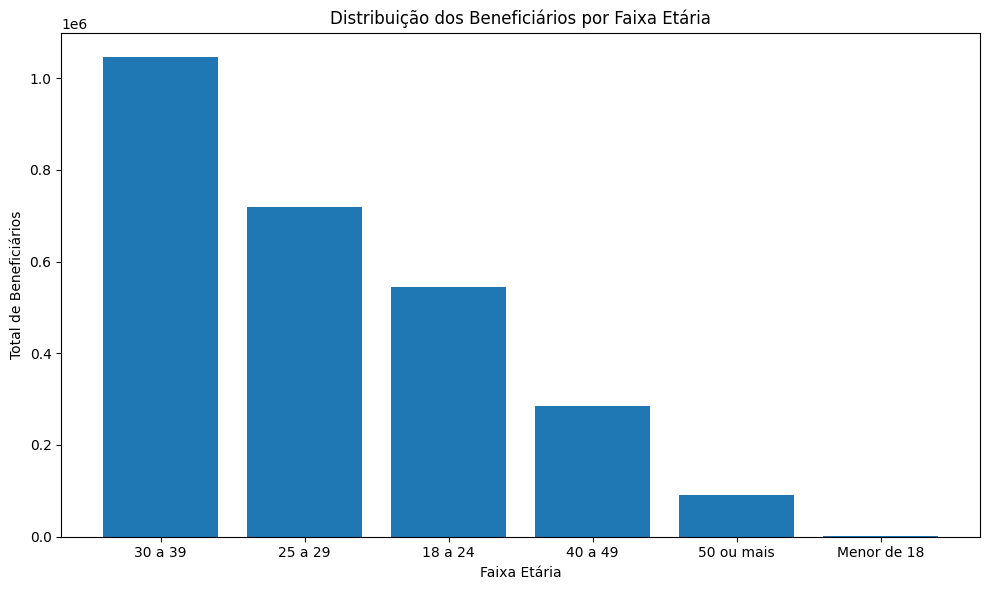

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(df["faixa_etaria"], df["total_beneficiarios"])
plt.title("Distribuição dos Beneficiários por Faixa Etária")
plt.xlabel("Faixa Etária")
plt.ylabel("Total de Beneficiários")
plt.tight_layout()
plt.show()


### Conclusão

A análise da faixa etária dos beneficiários do Prouni mostra que a maioria se concentra entre 18 e 39 anos, evidenciando que o programa atende predominantemente jovens em fase de ingresso ou consolidação no ensino superior.

A análise do perfil dos beneficiários do Prouni evidencia diferenças relevantes em relação ao sexo e à raça. Observa-se maior participação de beneficiários do sexo feminino, o que indica que o programa tem contribuído de forma significativa para ampliar o acesso das mulheres ao ensino superior.

Em relação à raça, verifica-se maior concentração de beneficiários autodeclarados como pardos e pretos, seguida por beneficiários brancos, o que reforça o caráter inclusivo do programa e seu papel na promoção da equidade racial no acesso à educação superior. Esses resultados refletem o público-alvo do Prouni, direcionado prioritariamente a estudantes de menor renda e historicamente sub-representados no ensino superior.

### Quais instituições concentram o maior número de bolsas?

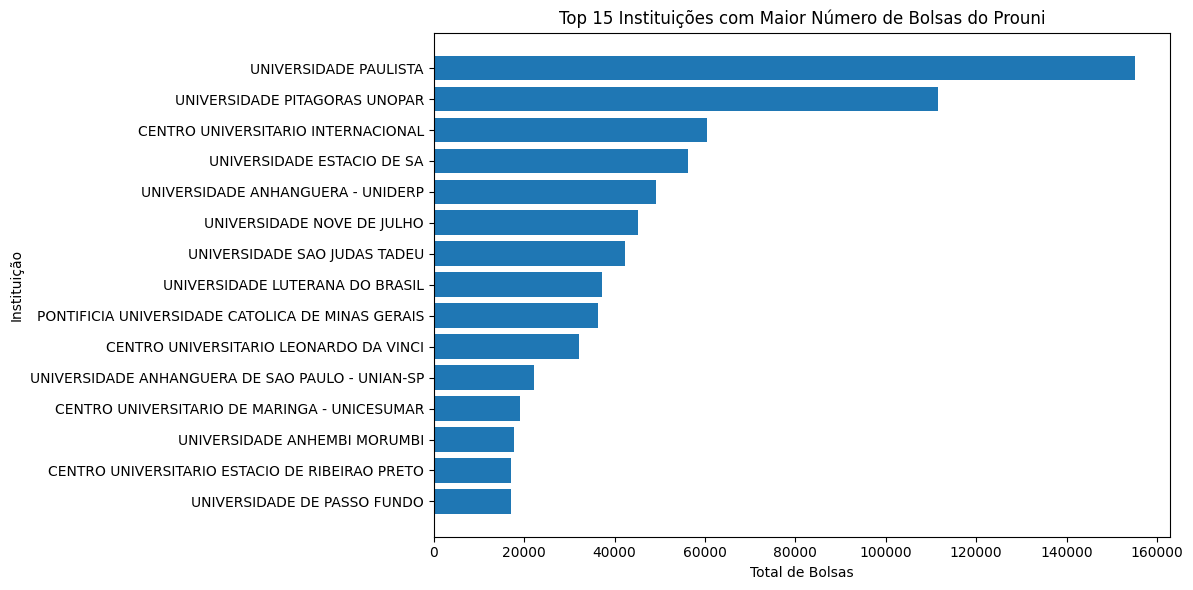

In [0]:
df_sql = spark.sql("""
SELECT 
    nome_ies_bolsa AS instituicao,
    COUNT(*) AS total_bolsas
FROM engenharia.prouni_gold.fato_prouni_gold
WHERE nome_ies_bolsa IS NOT NULL
GROUP BY nome_ies_bolsa
ORDER BY total_bolsas DESC
""")

# Converter para pandas e pegar TOP 15
df = df_sql.toPandas().head(15)

# Criar gráfico
plt.figure(figsize=(12,6))
plt.barh(df["instituicao"], df["total_bolsas"])
plt.title("Top 15 Instituições com Maior Número de Bolsas do Prouni")
plt.xlabel("Total de Bolsas")
plt.ylabel("Instituição")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Conclusão
### 
A análise evidencia que o maior número de bolsas do Prouni está concentrado em um conjunto específico de instituições de ensino superior. Essas instituições, em geral de grande porte, concentram elevado volume de beneficiários, refletindo sua ampla oferta de cursos e maior capilaridade no território nacional. Esse cenário indica que a estrutura e a abrangência das instituições influenciam diretamente a concentração das bolsas concedidas pelo programa.

### Qual o percentual de bolsas integrais e parciais?

In [0]:
df_sql = spark.sql("""
SELECT
    tipo_bolsa,
    COUNT(*) AS total_bolsas
FROM engenharia.prouni_gold.fato_prouni_gold
WHERE tipo_bolsa IS NOT NULL
GROUP BY tipo_bolsa
""")

df = df_sql.toPandas()

# Calcular percentual
df["percentual"] = (df["total_bolsas"] / df["total_bolsas"].sum()) * 100

df

,tipo_bolsa,total_bolsas,percentual
0,BOLSA PARCIAL 50%,810017,30.181934
1,BOLSA COMPLEMENTAR 25%,2310,0.086073
2,BOLSA INTEGRAL,1871454,69.731994


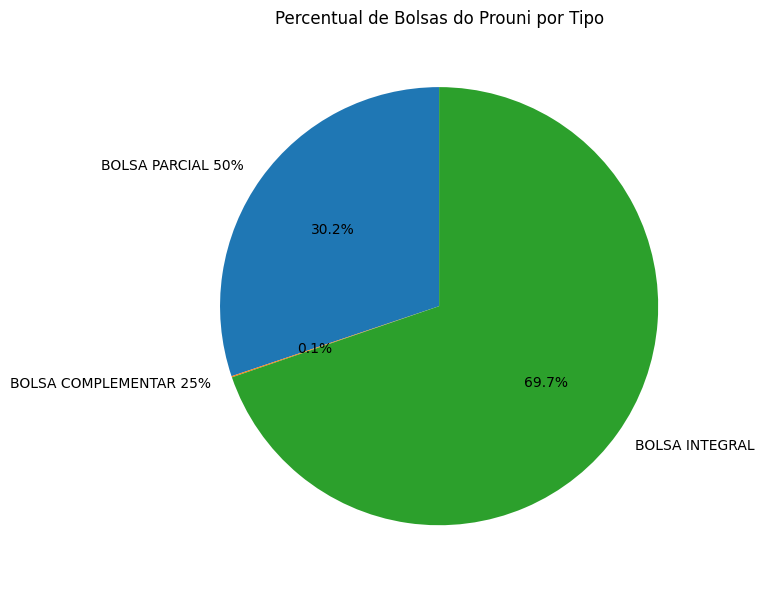

In [0]:
plt.figure(figsize=(8,6))
plt.pie(
    df["percentual"],
    labels=df["tipo_bolsa"],
    autopct="%.1f%%",
    startangle=90
)

plt.title("Percentual de Bolsas do Prouni por Tipo")
plt.tight_layout()
plt.show()

### Conclusão

A análise do tipo de bolsa concedida pelo Prouni evidencia a predominância de um dos modelos de benefício em relação ao outro. Observa-se que as bolsas integrais representam a maior parcela do total, indicando o foco do programa em atender estudantes com maior vulnerabilidade socioeconômica. As bolsas parciais, embora em menor proporção, complementam a política pública ao ampliar o acesso ao ensino superior para estudantes que conseguem arcar com parte do custo da mensalidade.

### Há tendência de crescimento ou redução nas concessões?

In [0]:
import matplotlib.pyplot as plt

df_sql = spark.sql("""
SELECT
    ano_concessao_bolsa AS ano,
    COUNT(*) AS total_bolsas
FROM engenharia.prouni_gold.fato_prouni_gold
WHERE ano_concessao_bolsa IS NOT NULL
GROUP BY ano_concessao_bolsa
ORDER BY ano_concessao_bolsa
""")

df = df_sql.toPandas()
df


,ano,total_bolsas
0,2005,93869
1,2006,108002
2,2007,104861
3,2008,123989
4,2009,160630
5,2010,151940
6,2011,170177
7,2012,176424
8,2013,176977
9,2014,223238


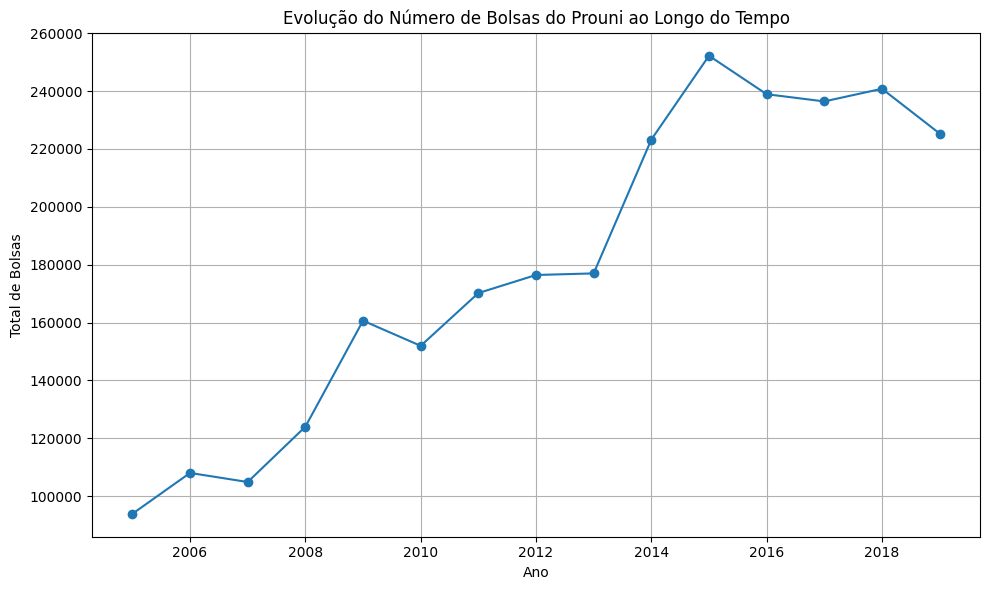

In [0]:
plt.figure(figsize=(10,6))
plt.plot(df["ano"], df["total_bolsas"], marker="o")
plt.title("Evolução do Número de Bolsas do Prouni ao Longo do Tempo")
plt.xlabel("Ano")
plt.ylabel("Total de Bolsas")
plt.grid(True)
plt.tight_layout()
plt.show()


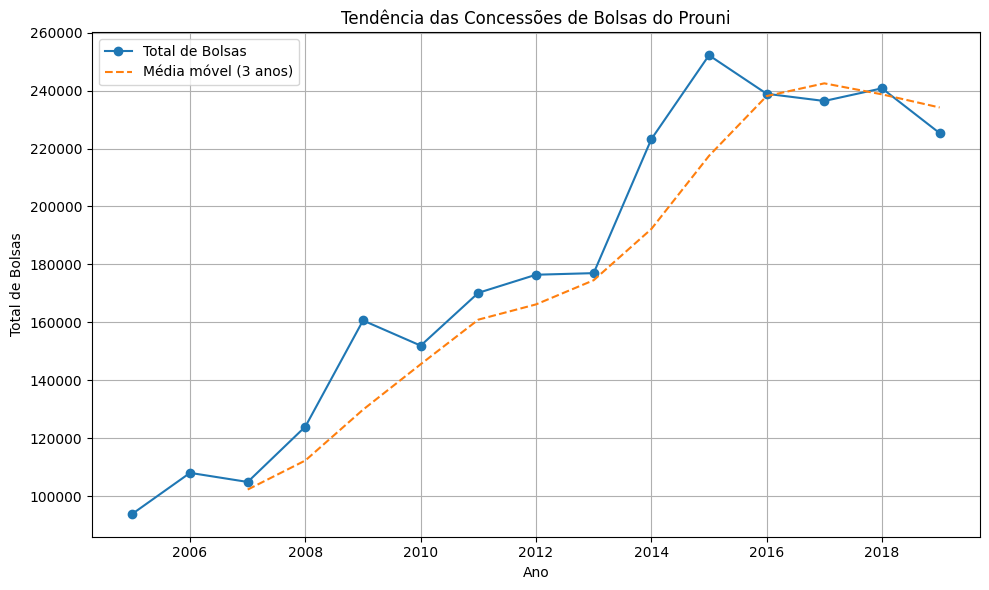

In [0]:
df["media_movel_3"] = df["total_bolsas"].rolling(window=3).mean()

plt.figure(figsize=(10,6))
plt.plot(df["ano"], df["total_bolsas"], marker="o", label="Total de Bolsas")
plt.plot(df["ano"], df["media_movel_3"], linestyle="--", label="Média móvel (3 anos)")
plt.title("Tendência das Concessões de Bolsas do Prouni")
plt.xlabel("Ano")
plt.ylabel("Total de Bolsas")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Conclusão

A análise da evolução anual das concessões de bolsas do Prouni evidencia variações ao longo do tempo, com períodos de crescimento e de redução. Essas oscilações indicam que o volume de bolsas concedidas não se mantém constante, sendo influenciado por fatores como disponibilidade orçamentária, diretrizes governamentais e contexto econômico. De modo geral, observa-se que a política de concessão apresenta comportamento cíclico, reforçando a importância da análise temporal para compreensão da dinâmica do programa.

### 14 Atingimento dos Objetivos

O objetivo principal deste projeto foi a construção de um pipeline de dados em nuvem utilizando o Databricks, desde a ingestão até a análise dos dados do Programa Universidade para Todos (Prouni), com foco na compreensão do perfil dos beneficiários, distribuição das bolsas e evolução das concessões ao longo do tempo.

Para atingir esse objetivo, foram realizadas as seguintes etapas:

Busca, coleta e ingestão dos dados do Prouni, garantindo sua correta disponibilização no ambiente de nuvem;

Estruturação do pipeline de dados seguindo a arquitetura Bronze, Silver e Gold, utilizando o Delta Lake, o que possibilitou maior controle de versionamento, qualidade e performance dos dados;

Modelagem dos dados em um esquema estrela, com uma tabela fato central e múltiplas tabelas dimensão, facilitando análises analíticas e consultas otimizadas;

Tratamento e padronização dos dados, incluindo correções de tipos, remoção de duplicidades e tratamento de valores inconsistentes;

Realização de análises exploratórias e descritivas, respondendo todas as questões propostas no início do projeto, como:

* Qual o volume total de bolsas concedidas ao longo dos anos?

* Quais cursos recebem mais bolsas?

* distribuição de bolsas por região, estado e município;

* perfil dos beneficiários (sexo, raça e faixa etária);

* instituições com maior concentração de bolsas;

* proporção entre bolsas integrais e parciais;

* análise temporal para identificação de tendências de crescimento ou redução nas concessões;

Geração de visualizações gráficas utilizando Matplotlib, permitindo uma interpretação clara e acessível dos resultados obtidos.

Dessa forma, considera-se que os objetivos definidos no início do projeto foram plenamente atingidos, uma vez que o pipeline construído possibilitou a análise estruturada e confiável dos dados do Prouni, atendendo ao problema central proposto. 

Por fim, este projeto proporcionou uma experiência prática relevante no uso do Databricks, Spark, Delta Lake e conceitos de engenharia e análise de dados, consolidando conhecimentos teóricos por meio de uma aplicação real.